In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [2]:
data = pd.read_excel("/content/drive/MyDrive/data/hierarchical_clustering.xlsx")
data

,Variable 1,Variable 2
0,2.00,2.0
1,5.50,4.0
2,5.00,5.0
3,1.50,2.5
4,1.00,1.0
5,7.00,5.0
6,5.75,6.5


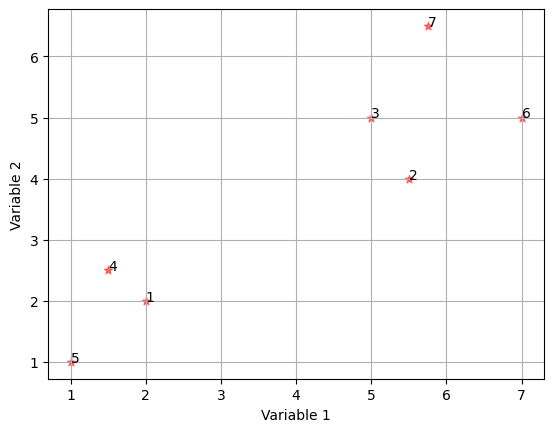

In [4]:
x = data["Variable 1"]
y = data["Variable 2"]
n = range(1, 8)

fig, ax = plt.subplots()
ax.scatter(x, y, marker="*", c = "red", alpha = 0.5)
plt.grid()
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
for i, txt in enumerate(n):
  ax.annotate(txt, (x[i], y[i]))

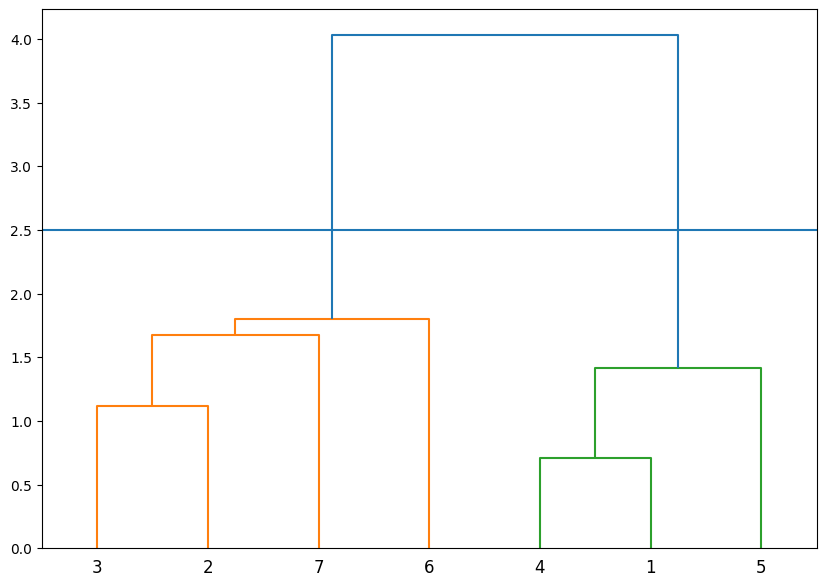

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data, "single")

labelList = range(1, 8)

plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    orientation="top",
    labels=labelList,
    distance_sort="descending",
    show_leaf_counts=True
    )

plt.axhline(y=2.5)
plt.show()

In [9]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, linkage = "single")
Hclustering.fit(data)

AgglomerativeClustering(linkage='single')

In [10]:
Hclustering.fit_predict(data)

array([1, 0, 0, 1, 1, 0, 0])

In [11]:
print(Hclustering.labels_)

[1 0 0 1 1 0 0]


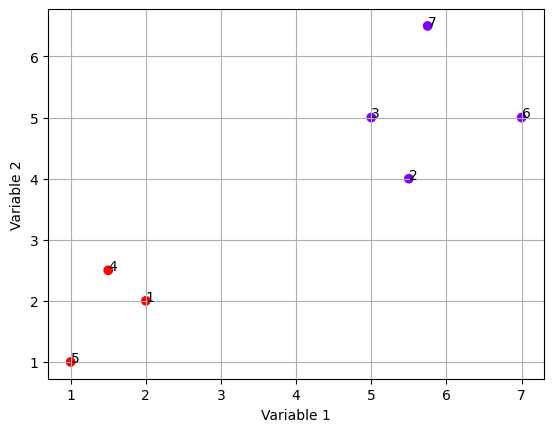

In [16]:
x = data["Variable 1"]
y = data["Variable 2"]

n = range(1, 8)
fig, ax = plt.subplots()
ax.scatter(x, y, c = Hclustering.labels_, cmap="rainbow")
plt.grid()
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")

for i, txt in enumerate(n):
  ax.annotate(txt, (x[i], y[i]))